In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [13]:
# Load dataset
df = pd.read_csv(r"C:\Users\Rishi\Desktop\Data-sci\sentiment analysis pipeline\data\IMDB_Dataset.csv")


In [14]:
df.shape # 50000 rows and 2 columns

(50000, 2)

In [16]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
df.info() #data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Text Cleaning
1. sample 10000 rows
2. Remove html tags
3. Remove special characters
4. Converting every thing to lower case
5. Remove stop wrods
6. Stemming

In [17]:

df=df.sample(10000)

In [18]:
df.shape

(10000, 2)

In [19]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)

C:\Users\Rishi\AppData\Local\Temp\ipykernel_2788\4240984564.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
C:\Users\Rishi\AppData\Local\Temp\ipykernel_2788\4240984564.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentim

In [20]:
df.head()

,review,sentiment
27524,I realize it's not supposed to be BSG and I ca...,0
31501,I watched this film a long time ago (aprox 10 ...,0
25175,Dr. Ben McKenna (James Stewart) and Jo McKenna...,1
13342,Emotionally insecure Tom Russo (Asbestos Felt)...,0
20381,Taylor Deemer Mrs. Drake English 10 PIB B4 31 ...,0


In [21]:
clean = re.compile('<.*?>')
re.sub(clean,'',df.iloc[2].review)

"Dr. Ben McKenna (James Stewart) and Jo McKenna (Doris Day) travel to Morocco for a holiday where they meet a mysterious man named Louis Bernard (Daniel Gélin) on a bus.The next day this man is murdered, but before he dies he tells Ben a secret; an assassination will take place in London.The crooks kidnap the couple's son Hank (Christopher Olsen) making sure Ben won't reveal their plan to anybody.Alfred Hitchcock's The Man Who Knew Too Much (1956) is a very intense thriller.The acting is superb as it always is in Hitchcok's films.James Stewart is marvelous.Doris Day is a delightful person and actress and she gets to show her singing talents as well.The song Que Sera, Sera has an important part in the movie.This movie is a movie of many classic scenes.In the final scenes at the Albert Hall, done without dialogue, you can barely blink your eyes.This movie is fifty years old now.Time hasn't decreased its power in any way."

In [22]:
# fuction to clean html tags
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean,'',text)

In [23]:
df['review']=df['review'].apply(clean_html)

In [24]:
# converting everything to lower
def convert_lower(text):
    return text.lower()

In [25]:
# function to remove special characters
def remove_special(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x

In [26]:
df['review']=df['review'].apply(convert_lower)
df['review']=df['review'].apply(remove_special)

In [ ]:
# Text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    return text

df['cleaned_review'] = df['review_text'].apply(clean_text)

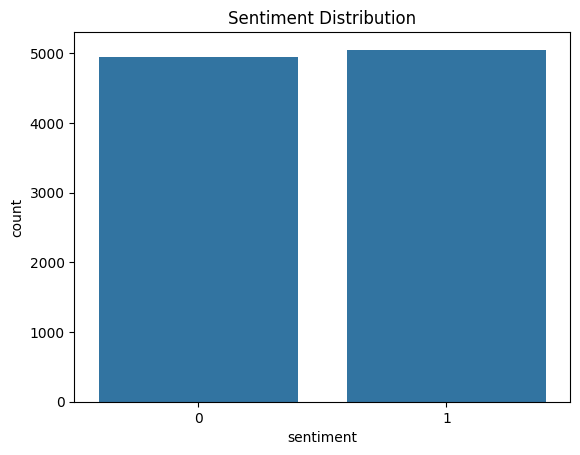

In [28]:
# EDA: Distribution of sentiments
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()



In [30]:
df.head()

,review,sentiment
27524,i realize it s not supposed to be bsg and i ca...,0
31501,i watched this film a long time ago aprox 10 ...,0
25175,dr ben mckenna james stewart and jo mckenna...,1
13342,emotionally insecure tom russo asbestos felt ...,0
20381,taylor deemer mrs drake english 10 pib b4 31 ...,0


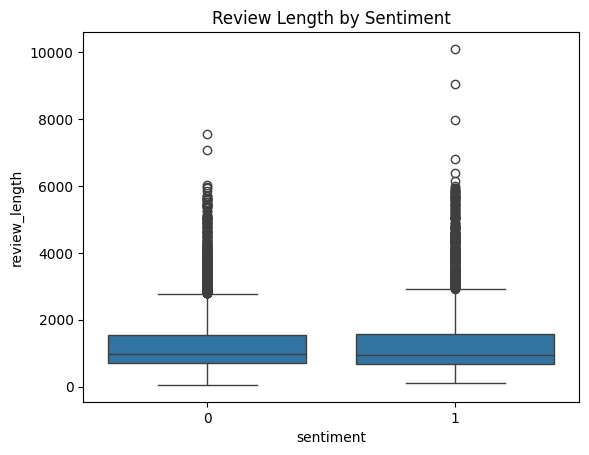

In [31]:
# EDA: Review lengths
df['review_length'] = df['review'].apply(len)
sns.boxplot(data=df, x='sentiment', y='review_length')
plt.title("Review Length by Sentiment")
plt.show()